## Predictive Maintenance of NASA Turbofan Engines

The goal of the project focuses on prediction of the RUL (Remaining Useful Lifestyle) of the turbofan engine. The dataset can be obtained thro https://www.kaggle.com/datasets/behrad3d/nasa-cmaps.

### 1. Overview of the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# setting to show all rows, comment to disable it

# pd.set_option('display.max_rows', None)

In [3]:
index_names = ['unit_number', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['sensor_{}'.format(i + 1) for i in range(0, 21)]
col_names = index_names + setting_names + sensor_names

In [4]:
sensor_dictionary = {}

dict_list= [ 
    "(Fan inlet temperature) (◦R)",
    "(LPC outlet temperature) (◦R)",
    "(HPC outlet temperature) (◦R)",
    "(LPT outlet temperature) (◦R)",
    "(Fan inlet Pressure) (psia)",
    "(bypass-duct pressure) (psia)",
    "(HPC outlet pressure) (psia)",
    "(Physical fan speed) (rpm)",
    "(Physical core speed) (rpm)",
    "(Engine pressure ratio(P50/P2)",
    "(HPC outlet Static pressure) (psia)",
    "(Ratio of fuel flow to Ps30) (pps/psia)",
    "(Corrected fan speed) (rpm)",
    "(Corrected core speed) (rpm)",
    "(Bypass Ratio) ",
    "(Burner fuel-air ratio)",
    "(Bleed Enthalpy)",
    "(Required fan speed)",
    "(Required fan conversion speed)",
    "(High-pressure turbines Cool air flow)",
    "(Low-pressure turbines Cool air flow)" 
]

In [5]:
df_train_fd001 = pd.read_csv('data/CMaps/train_FD001.txt', header = None, index_col = False, sep = '\s+', names = col_names)
df_train_fd002 = pd.read_csv('data/CMaps/train_FD002.txt', header = None, index_col = False, sep = '\s+', names = col_names)
df_train_fd003 = pd.read_csv('data/CMaps/train_FD003.txt', header = None, index_col = False, sep = '\s+', names = col_names)
df_train_fd004 = pd.read_csv('data/CMaps/train_FD004.txt', header = None, index_col = False, sep = '\s+', names = col_names)

df_test_fd001 = pd.read_csv('data/CMaps/test_FD001.txt', header = None, index_col = False, sep = '\s+', names = col_names)
df_test_fd002 = pd.read_csv('data/CMaps/test_FD002.txt', header = None, index_col = False, sep = '\s+', names = col_names)
df_test_fd003 = pd.read_csv('data/CMaps/test_FD003.txt', header = None, index_col = False, sep = '\s+', names = col_names)
df_test_fd004 = pd.read_csv('data/CMaps/test_FD004.txt', header = None, index_col = False, sep = '\s+', names = col_names)

y_fd001 = pd.read_csv('data/CMaps/RUL_FD001.txt', header = None, index_col = False, sep = '\s+', names=['RUL'])
y_fd002 = pd.read_csv('data/CMaps/RUL_FD002.txt', header = None, index_col = False, sep = '\s+', names=['RUL'])
y_fd003 = pd.read_csv('data/CMaps/RUL_FD003.txt', header = None, index_col = False, sep = '\s+', names=['RUL'])
y_fd004 = pd.read_csv('data/CMaps/RUL_FD004.txt', header = None, index_col = False, sep = '\s+', names=['RUL'])

In [6]:
df_train_fd002.describe()

,unit_number,time_cycles,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
count,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,...,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000
mean,131.082981,109.154746,23.998407,0.572056,94.046020,472.910207,579.672399,1419.971013,1205.442024,8.031986,...,266.069034,2334.557253,8066.597682,9.329654,0.023326,348.309511,2228.806358,97.756838,20.789296,12.473423
std,74.463862,69.180569,14.747376,0.310016,14.237735,26.389707,37.289399,105.946341,119.123428,3.613839,...,137.659507,128.068271,84.837950,0.749335,0.004711,27.754515,145.327980,5.364067,9.869331,5.921615
min,1.000000,1.000000,0.000000,0.000000,60.000000,445.000000,535.530000,1243.730000,1023.770000,3.910000,...,129.120000,2027.610000,7848.360000,8.335700,0.020000,303.000000,1915.000000,84.930000,10.180000,6.010500
25%,68.000000,52.000000,10.004600,0.250700,100.000000,445.000000,549.570000,1352.760000,1123.655000,3.910000,...,131.520000,2387.900000,8062.140000,8.677800,0.020000,331.000000,2212.000000,100.000000,10.910000,6.546300
50%,131.000000,104.000000,25.001300,0.700000,100.000000,462.540000,555.980000,1369.180000,1138.890000,7.050000,...,183.200000,2388.080000,8082.540000,9.310900,0.020000,335.000000,2223.000000,100.000000,14.880000,8.929200
75%,195.000000,157.000000,41.998000,0.840000,100.000000,491.190000,607.340000,1499.370000,1306.850000,10.520000,...,371.260000,2388.170000,8127.195000,9.386900,0.030000,369.000000,2324.000000,100.000000,28.470000,17.083200
max,260.000000,378.000000,42.008000,0.842000,100.000000,518.670000,644.520000,1612.880000,1439.230000,14.620000,...,523.370000,2390.480000,8268.500000,11.066900,0.030000,399.000000,2388.000000,100.000000,39.340000,23.590100


In [7]:
train_fd001 = df_train_fd001.copy()
train_fd002 = df_train_fd002.copy()
train_fd003 = df_train_fd003.copy()
train_fd004 = df_train_fd004.copy()

In [8]:
len(train_fd004)

61249

In [9]:
len(train_fd003)

24720

In [10]:
len(train_fd002)

53759

In [11]:
len(train_fd001)

20631

### 2. Data pre-processing

In [12]:
def add_rul_column(df):
    train_grouped_by_unit = df.groupby(by='unit_number') 
    max_time_cycles = train_grouped_by_unit['time_cycles'].max()  
    merged = df.merge(max_time_cycles.to_frame(name = 'max_time_cycle'), left_on = 'unit_number', right_index = True)
    merged["rul"] = merged["max_time_cycle"] - merged['time_cycles']
    merged = merged.drop("max_time_cycle", axis = 1)

    return merged

In [13]:
def add_rul_column_test(df, dfy):
    y_test = dfy.copy()
    y_test["unit_number"] = y_test.index + 1
    max_rul = pd.DataFrame(df.groupby('unit_number')['time_cycles'].max()).reset_index()
    max_rul.columns = ['unit_number', 'max_time_cycles']
    merged = y_test.merge(max_rul, how = 'inner', on = 'unit_number')
    merged["failed_rul"] = merged["RUL"] + merged["max_time_cycles"]
    merged.drop(["RUL", "max_time_cycles"], axis = 1)
    merged_c = merged.drop(["RUL", "max_time_cycles"], axis = 1)
    test = pd.DataFrame(df.groupby('unit_number')['time_cycles'].max()).reset_index().merge(merged_c, how = 'inner', on = 'unit_number')
    test = test.drop(["time_cycles"], axis = 1)
    
    return test

In [14]:
train_fd001 = add_rul_column(train_fd001)
train_fd002 = add_rul_column(train_fd002)
train_fd003 = add_rul_column(train_fd003)
train_fd004 = add_rul_column(train_fd004)

In [15]:
# Convert to csv

train_fd001.to_csv("data/train_fd001_with_rul.csv", index = False)
train_fd002.to_csv("data/train_fd002_with_rul.csv", index = False)
train_fd003.to_csv("data/train_fd003_with_rul.csv", index = False)
train_fd004.to_csv("data/train_fd004_with_rul.csv", index = False)

In [16]:
test_fd001 = df_test_fd001.copy()
test_fd002 = df_test_fd002.copy()
test_fd003 = df_test_fd003.copy()
test_fd004 = df_test_fd004.copy()

f_test_fd001 = add_rul_column_test(test_fd001, y_fd001)
f_test_fd002 = add_rul_column_test(test_fd002, y_fd002)
f_test_fd003 = add_rul_column_test(test_fd003, y_fd003)
f_test_fd004 = add_rul_column_test(test_fd004, y_fd004)

test_fd001 = test_fd001.merge(f_test_fd001, how = 'inner', on = 'unit_number')
test_fd001['rul'] = test_fd001['failed_rul'] - test_fd001['time_cycles']
test_fd001 = test_fd001.drop(["failed_rul"], axis = 1)

test_fd002 = test_fd002.merge(f_test_fd002, how = 'inner', on = 'unit_number')
test_fd002['rul'] = test_fd002['failed_rul'] - test_fd002['time_cycles']
test_fd002 = test_fd002.drop(["failed_rul"], axis = 1)

test_fd003 = test_fd003.merge(f_test_fd003, how = 'inner', on = 'unit_number')
test_fd003['rul'] = test_fd003['failed_rul'] - test_fd003['time_cycles']
test_fd003 = test_fd003.drop(["failed_rul"], axis = 1)

test_fd004 = test_fd004.merge(f_test_fd004, how = 'inner', on = 'unit_number')
test_fd004['rul'] = test_fd004['failed_rul'] - test_fd004['time_cycles']
test_fd004 = test_fd004.drop(["failed_rul"], axis = 1)

In [17]:
# Convert to csv

test_fd001.to_csv("data/test_fd001_with_rul.csv", index = False)
test_fd002.to_csv("data/test_fd002_with_rul.csv", index = False)
test_fd003.to_csv("data/test_fd003_with_rul.csv", index = False)
test_fd004.to_csv("data/test_fd004_with_rul.csv", index = False)

### 3. EDA

In [33]:
df_train_fd001 = pd.read_csv('data/train_fd001_with_rul.csv')
df_test_fd001 = pd.read_csv('data/test_fd001_with_rul.csv')

In [34]:
df_train_fd001

,unit_number,time_cycles,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,rul
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


#### RUL histogram plotting
The distribution of RUL is right skewed. Smost engines break down around 200 cycles and only few engines lasting over 300 cycles.

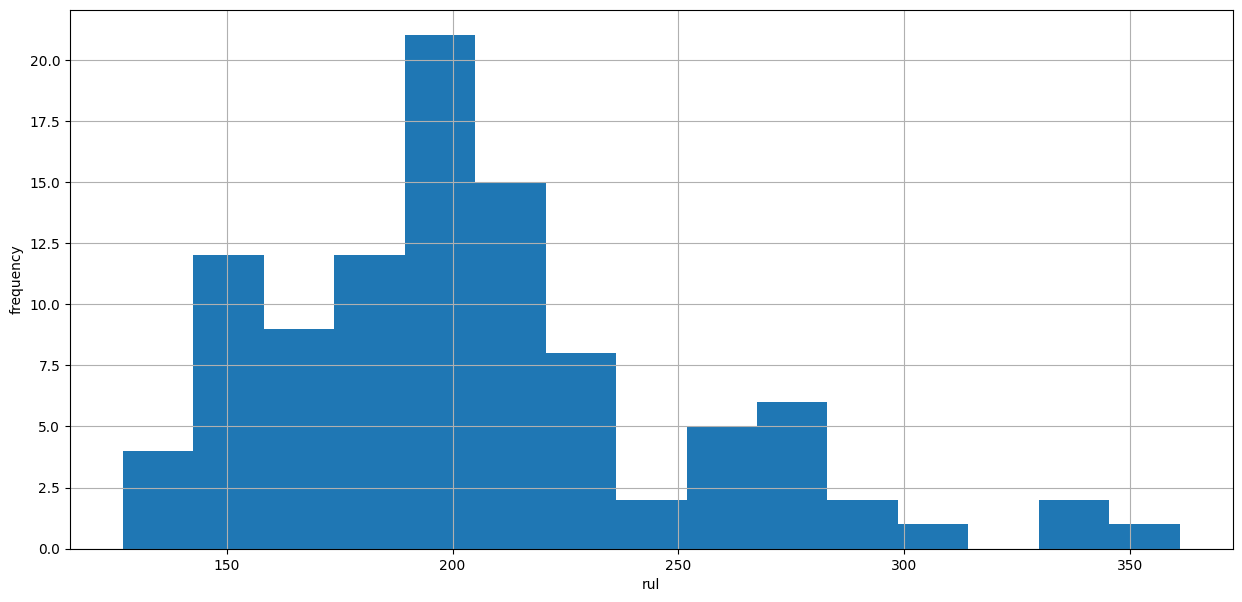

In [35]:
df_max_rul = df_train_fd001[['unit_number', 'rul']].groupby('unit_number').max().reset_index()

df_max_rul['rul'].hist(bins = 15, figsize = (15, 7))
plt.xlabel('rul')
plt.ylabel('frequency')
plt.show()

#### Matrix correlation
Visualization of important features which have strong relation with RUL of the engine. Select only important features for model building in order to avoid problem of overfitting.

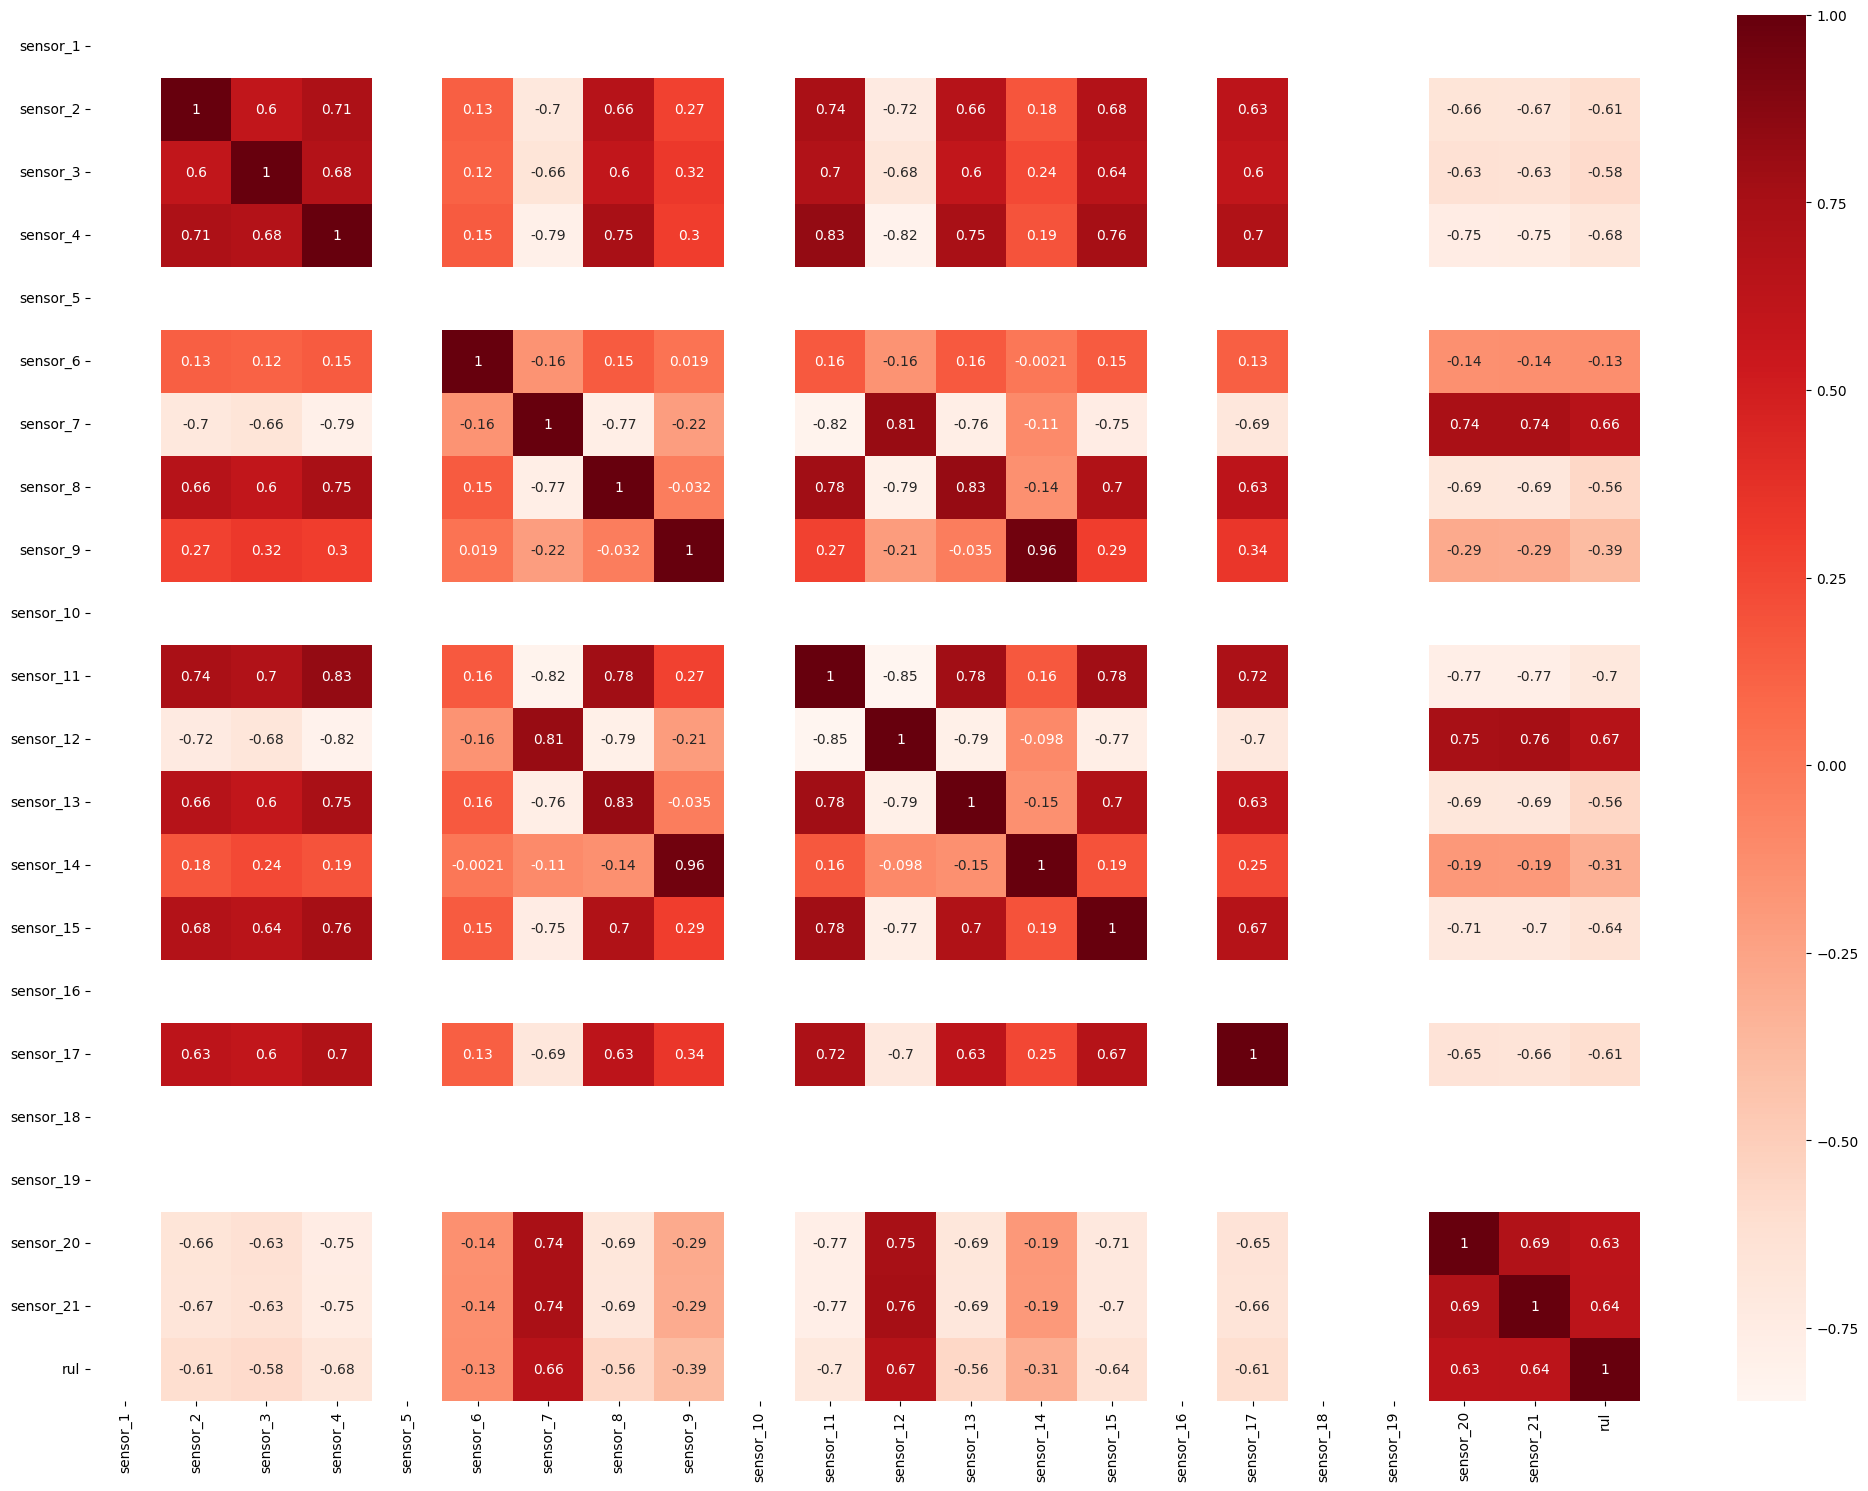

In [36]:
plt.figure(figsize = (25, 18))
sns.heatmap(df_train_fd001[['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6',
                            'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 
                            'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 
                            'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'rul']].corr(), annot = True, cmap = 'Reds')
plt.show()

Select only those features which have absolute value of correlation with RUL greater & equal than 0.5.

In [37]:
cor = df_train_fd001.corr()

train_relevant_features = cor[abs(cor['rul']) >= 0.5]
train_relevant_features['rul']

time_cycles   -0.736241
sensor_2      -0.606484
sensor_3      -0.584520
sensor_4      -0.678948
sensor_7       0.657223
sensor_8      -0.563968
sensor_11     -0.696228
sensor_12      0.671983
sensor_13     -0.562569
sensor_15     -0.642667
sensor_17     -0.606154
sensor_20      0.629428
sensor_21      0.635662
rul            1.000000
Name: rul, dtype: float64

#### Plot for some of the sensors having relation with RUL


Due to the large number of engines, it is not feasible to plot every engine for every sensor. 10 engines will be chosen based on unit_number which is divisible by 10 with a remainder of 0.

In [54]:
def plot_sensor(sensor_name):
    plt.figure(figsize = (13, 5))
    for i in df_train_fd001['unit_number'].unique():
        if (i % 10 == 0):
            plt.plot('rul', sensor_name, 
                     data = df_train_fd001[df_train_fd001['unit_number'] == i])
    plt.xlim(250, 0)
    plt.xticks(np.arange(0, 275, 25))
    plt.ylabel(sensor_name)
    plt.xlabel('Remaining Use fulLife')
    plt.show()

Sensor 1, 5, 10, 16, 18 and 19 show similiar flat line which hold no useful information.

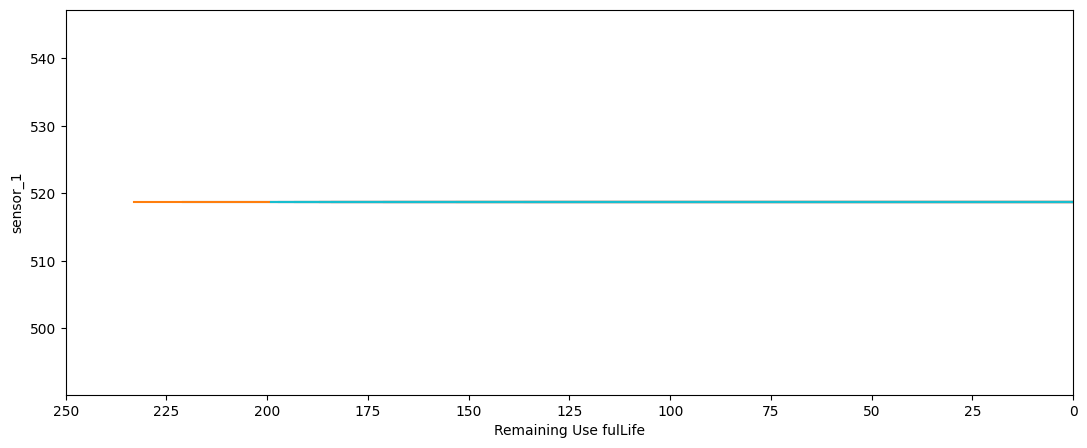

In [56]:
plot_sensor("sensor_1")

Sensor 2 shows a rising trend, sensor 3, 4, 8, 11, 13, 15 and 17 show similiar trend.

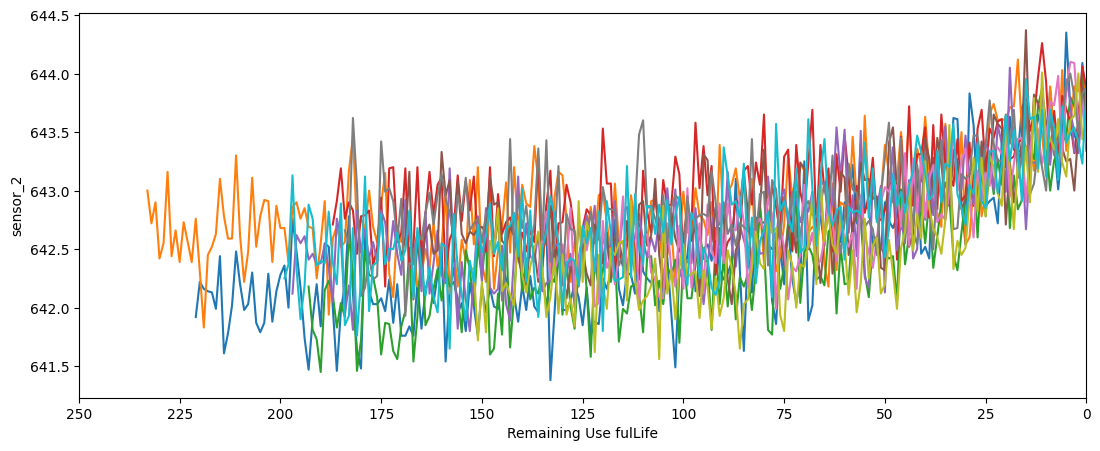

In [57]:
plot_sensor("sensor_2")

Sensor 6 peak downwards at times but there does not seem to be a clear relation to the decreasing RUL.

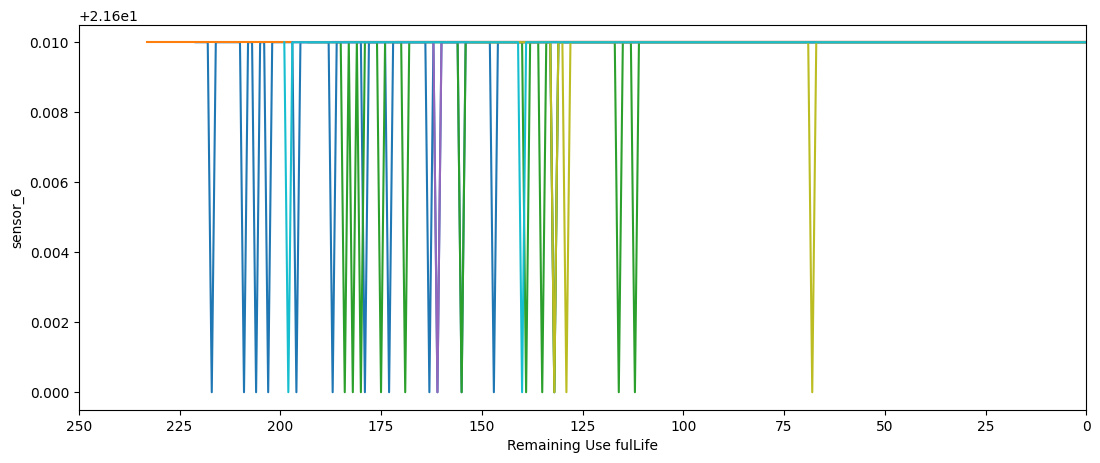

In [59]:
plot_sensor("sensor_6")

Sensor 7 shows a declining trend, which can also be seen in sensors 12, 20 and 21.

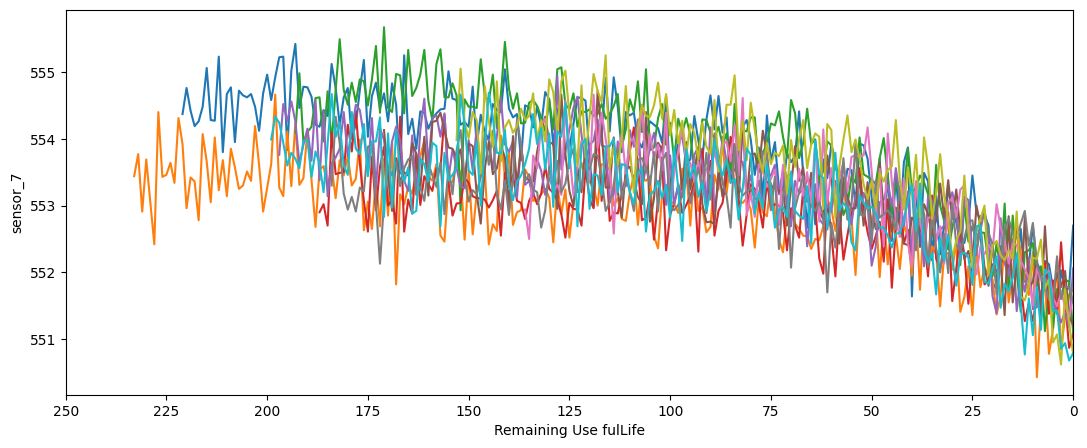

In [60]:
plot_sensor("sensor_7")

Sensor 9 has a similar pattern as sensor 14.

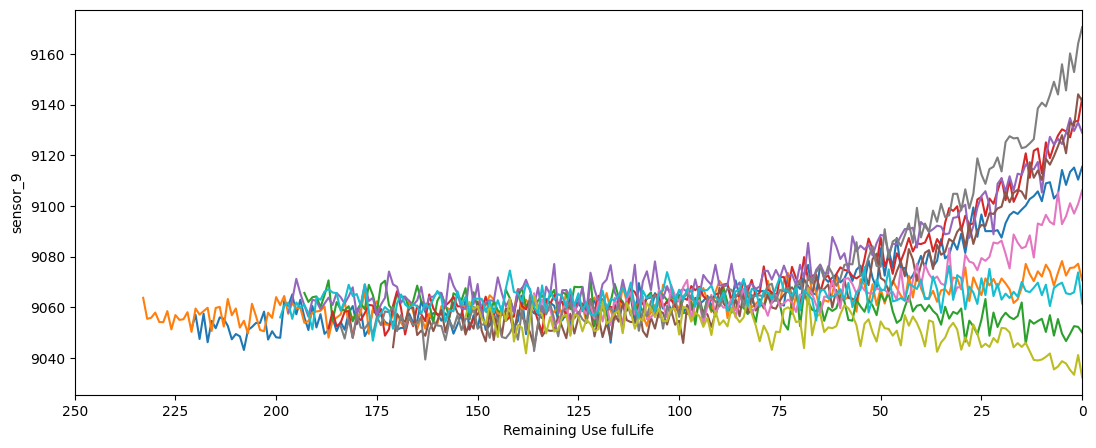

In [61]:
plot_sensor("sensor_9")

We can safely conclude that sensors 1, 5, 6, 10, 16, 18 and 19 hold no information related to RUL as the sensor values remain constant throughout time. 

In [23]:
list_relevant_features = train_relevant_features.index
list_relevant_features = list_relevant_features[1:]
list_relevant_features

Index(['sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_8', 'sensor_11',
       'sensor_12', 'sensor_13', 'sensor_15', 'sensor_17', 'sensor_20',
       'sensor_21', 'rul'],
      dtype='object')

In [24]:
df_train_fd001 = df_train_fd001[list_relevant_features]
df_train_fd001

,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_11,sensor_12,sensor_13,sensor_15,sensor_17,sensor_20,sensor_21,rul
0,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,643.49,1597.98,1428.63,551.43,2388.19,48.07,519.49,2388.26,8.4956,397,38.49,22.9735,4
20627,643.54,1604.50,1433.58,550.86,2388.23,48.04,519.68,2388.22,8.5139,395,38.30,23.1594,3
20628,643.42,1602.46,1428.18,550.94,2388.24,48.09,520.01,2388.24,8.5646,398,38.44,22.9333,2
20629,643.23,1605.26,1426.53,550.68,2388.25,48.39,519.67,2388.23,8.5389,395,38.29,23.0640,1


In [25]:
y_train = df_train_fd001['rul']
x_train = df_train_fd001.drop(['rul'], axis = 1)

x_train.head(5)

,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_11,sensor_12,sensor_13,sensor_15,sensor_17,sensor_20,sensor_21
0,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190
1,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236
2,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442
3,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739
4,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044


In [26]:
x_test = df_test_fd001[x_train.columns]
x_test.head(5)

,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_11,sensor_12,sensor_13,sensor_15,sensor_17,sensor_20,sensor_21
0,643.02,1585.29,1398.21,553.90,2388.04,47.20,521.72,2388.03,8.4052,392,38.86,23.3735
1,641.71,1588.45,1395.42,554.85,2388.01,47.50,522.16,2388.06,8.3803,393,39.02,23.3916
2,642.46,1586.94,1401.34,554.11,2388.05,47.50,521.97,2388.03,8.4441,393,39.08,23.4166
3,642.44,1584.12,1406.42,554.07,2388.03,47.28,521.38,2388.05,8.3917,391,39.00,23.3737
4,642.51,1587.19,1401.92,554.16,2388.01,47.31,522.15,2388.03,8.4031,390,38.99,23.4130


#### Re-examining RUL

In [62]:
y_train = y_train.clip(upper = 125)